48581 Dataset hubgene prediction & model selection

In [17]:
import pandas as pd

# 读取表达矩阵（行为样本，列为基因 + 标签）
expression_df = pd.read_csv("gse48581.csv", index_col=0)

In [2]:
expression_df

,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,CYP2E1,...,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,Diagnosis
GSM1181496,11.470281,7.907461,6.965705,11.435293,3.757472,8.628549,7.692872,5.538287,9.831144,8.203077,...,9.897595,9.143688,9.779019,11.039537,10.455694,13.208906,12.411459,14.533467,14.236086,non-TCMR
GSM1181497,11.229925,8.043809,7.055036,11.149914,3.315159,8.244606,7.290996,5.378012,8.247645,5.093607,...,9.827651,8.991790,9.800053,10.930397,10.420508,13.133785,12.540637,14.516156,14.274544,non-TCMR
GSM1181498,11.088060,7.656739,6.449851,11.075646,3.635014,8.249415,7.546280,5.586520,7.030063,5.043867,...,9.548678,8.828183,9.411263,10.779396,10.312240,13.003317,12.298737,14.371308,14.141068,non-TCMR
GSM1181499,11.424030,7.719578,6.307674,11.124469,3.687385,8.208735,7.795157,5.519622,6.375276,6.522005,...,9.778859,9.094259,9.549352,10.762561,10.288421,13.095126,12.259252,14.418170,14.192961,non-TCMR
GSM1181500,10.636565,7.714332,6.665597,10.814759,3.843610,8.061417,7.644351,5.587440,7.212195,5.131696,...,10.070893,9.061685,9.790334,11.017493,10.499448,13.185713,12.547003,14.486119,14.258236,non-TCMR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1181812,10.454048,7.706253,6.524251,10.607357,3.605969,8.460911,7.513208,5.416094,11.424121,5.430866,...,7.995517,7.071609,7.489722,10.506278,9.999209,13.236914,12.404531,14.599733,14.394514,TCMR
GSM1181813,11.388653,7.807778,6.614894,11.171034,3.629013,7.898539,7.579380,5.531614,7.279399,5.259826,...,6.964866,5.988232,6.426082,10.763412,10.261191,13.127948,12.523954,14.551507,14.329776,non-TCMR
GSM1181814,11.519708,7.760067,6.603103,11.364226,3.813848,7.736864,7.594289,5.319085,6.958215,7.631223,...,9.762725,9.191578,9.420527,10.908478,10.432469,13.025978,12.159401,14.488154,14.230359,non-TCMR
GSM1181815,11.199254,7.673119,6.739547,11.152608,3.723227,8.171448,7.197212,5.525404,8.098440,6.139191,...,9.689791,8.839342,9.492090,10.688527,10.284390,13.022372,12.415825,14.379308,14.081824,non-TCMR


21374's interval hubgene

In [3]:
hub_genes = ["CXCL9", "MIR155 /// MIR155HG", "CD8A", "CLIC2", "GBP5.1", "235229_at", "RP1-93H18.6"]

Logistic Regression Coefficients:
                  Gene  Coefficient
5            235229_at    -0.675164
2                 CD8A    -0.510494
3                CLIC2     0.382328
4               GBP5.1     0.365006
6          RP1-93H18.6    -0.235977
1  MIR155 /// MIR155HG     0.069461
0                CXCL9     0.050358


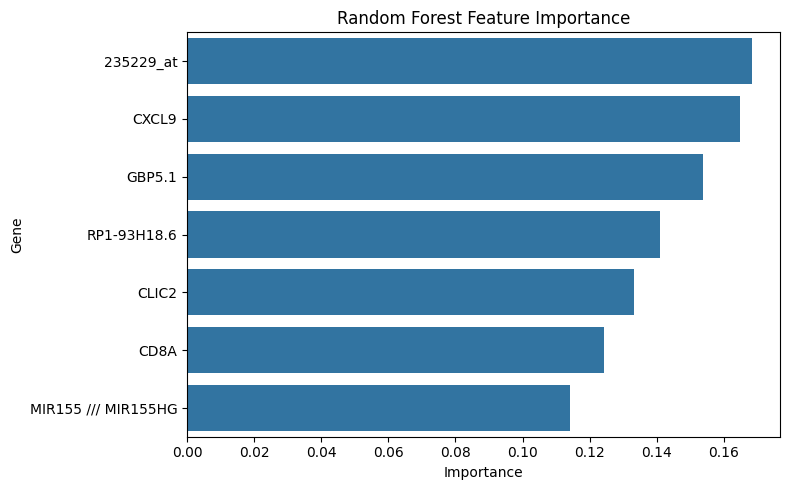


AUC - Logistic: 0.864
AUC - Random Forest: 0.850


In [4]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["non-TCMR"] else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [5]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.869


21374's cyto node hub gene

In [6]:
hub_genes = ["CXCL9", "GZMA", "CD8A", "IDO1", "CD69"]

Logistic Regression Coefficients:
    Gene  Coefficient
2   CD8A    -0.845168
1   GZMA     0.481272
3   IDO1    -0.217484
4   CD69    -0.107151
0  CXCL9    -0.011622


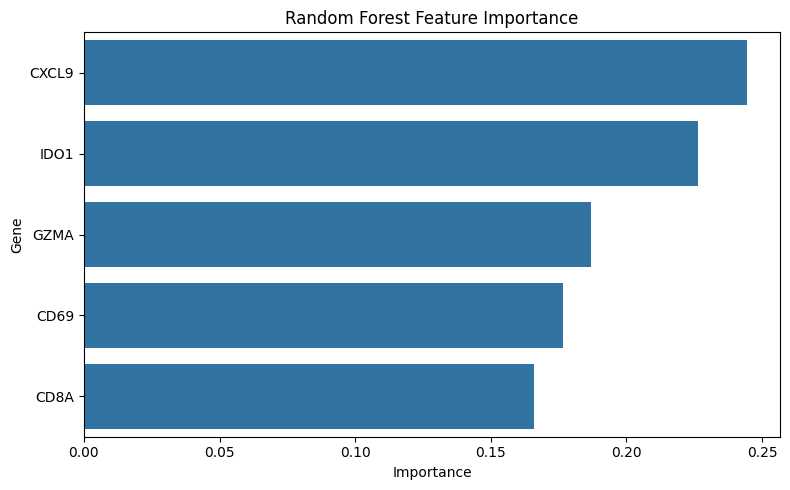


AUC - Logistic: 0.843
AUC - Random Forest: 0.701


In [7]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["non-TCMR"] else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [8]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.788


36059's interval hub gene

In [9]:
hub_genes = ["CCL4", "PLA1A", "FAM26F.1", "CXCL11", "RBP7", "IDO1"]

Logistic Regression Coefficients:
       Gene  Coefficient
5      IDO1    -0.433507
0      CCL4    -0.429745
3    CXCL11     0.197391
2  FAM26F.1    -0.114955
1     PLA1A     0.113838
4      RBP7     0.112610


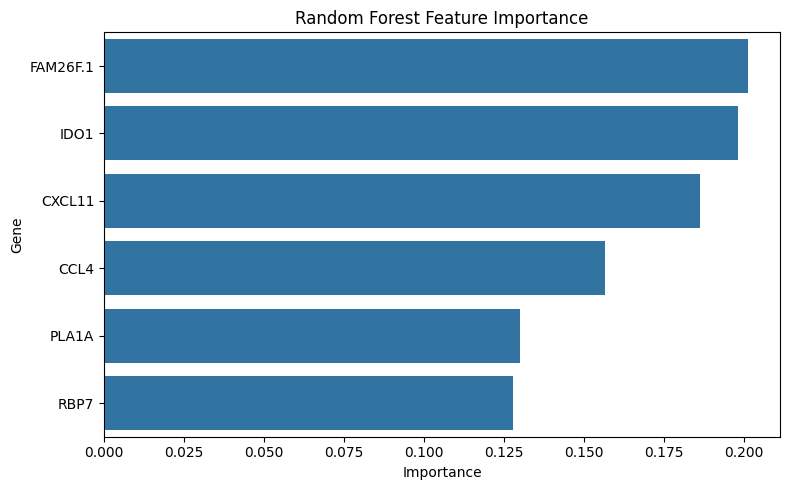


AUC - Logistic: 0.859
AUC - Random Forest: 0.724


In [10]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["non-TCMR"] else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [11]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.813


36059's cyto node hub gene

In [12]:
hub_genes = ["CXCL10", "IDO1", "LILRB2", "CXCL9", "CCL4"]

Logistic Regression Coefficients:
     Gene  Coefficient
2  LILRB2    -0.706667
0  CXCL10     0.252705
1    IDO1    -0.234411
4    CCL4    -0.222288
3   CXCL9    -0.154057


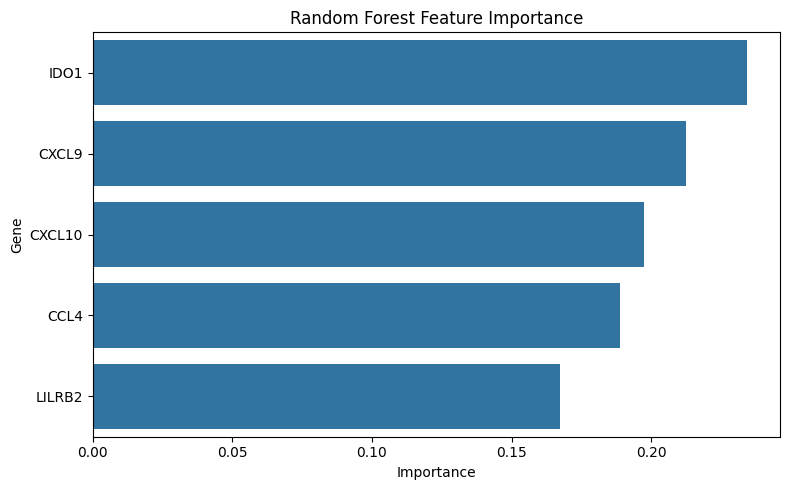


AUC - Logistic: 0.842
AUC - Random Forest: 0.870


In [13]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["non-TCMR"] else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [15]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.870


48581's interval hub gene

In [18]:
hub_genes = ["SCMH1", "WDR3", "LOC100507073"]

Logistic Regression Coefficients:
           Gene  Coefficient
2  LOC100507073     1.629550
0         SCMH1     1.598299
1          WDR3     1.386054


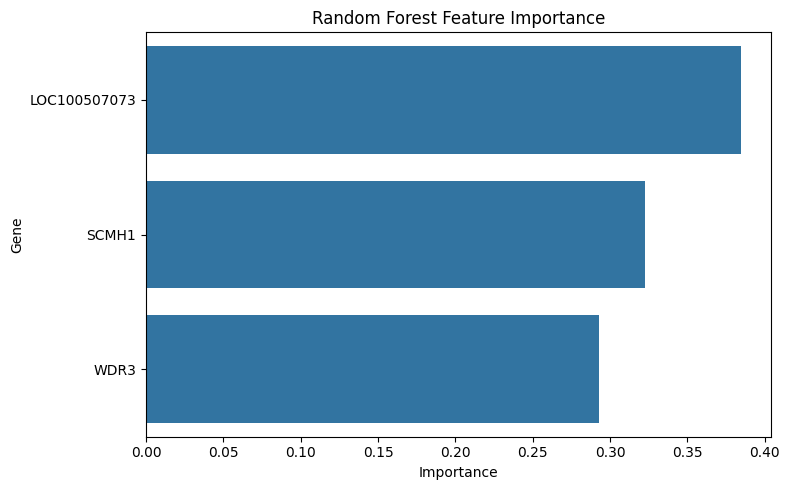


AUC - Logistic: 0.829
AUC - Random Forest: 0.750


In [19]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["non-TCMR"] else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [20]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.798


48581's cyto node hub gene

In [21]:
hub_genes = ["CXCL13", "LILRB2", "CD8A", "FOS", "RGS1"]

Logistic Regression Coefficients:
     Gene  Coefficient
3     FOS    -0.728363
2    CD8A    -0.564988
1  LILRB2    -0.240289
4    RGS1     0.228770
0  CXCL13    -0.106756


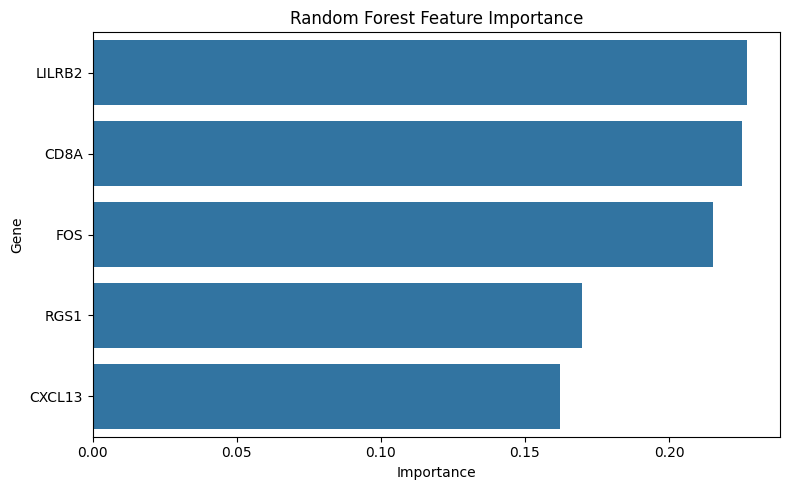


AUC - Logistic: 0.930
AUC - Random Forest: 0.846


In [22]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["non-TCMR"] else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [23]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.912


50058's interval hubgene

In [24]:
hub_genes = ["FAM26F.1", "GPR171", "229668_at", "B2M.2", "FAXDC2", "CCL4", "CXCL11", "SOST"]

Logistic Regression Coefficients:
        Gene  Coefficient
4     FAXDC2     1.294068
7       SOST    -0.728405
3      B2M.2     0.631270
5       CCL4    -0.579066
0   FAM26F.1    -0.306149
2  229668_at    -0.249460
1     GPR171    -0.230601
6     CXCL11     0.015486


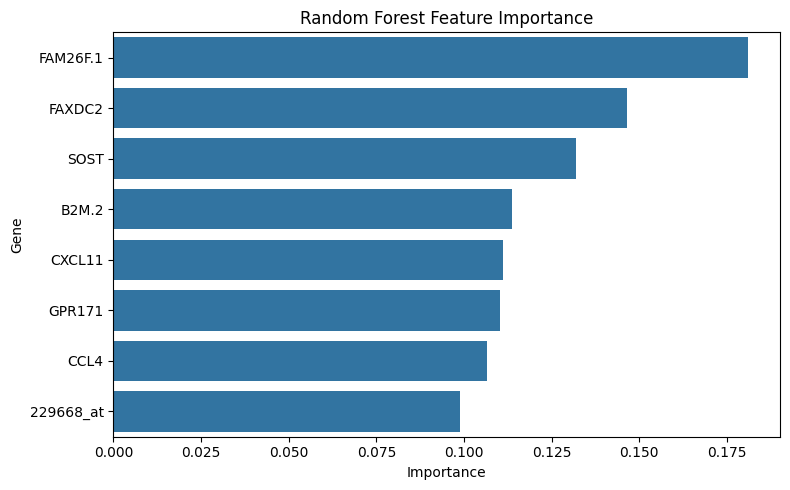


AUC - Logistic: 0.873
AUC - Random Forest: 0.934


In [25]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["non-TCMR"] else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [26]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.926


59958's cyto node hubgene

In [27]:
hub_genes = ["CXCL11", "B2M", "LCP2", "CCL4",  "FCGR3B"]

Logistic Regression Coefficients:
     Gene  Coefficient
1     B2M    -0.539025
3    CCL4    -0.358455
4  FCGR3B    -0.335613
2    LCP2    -0.274974
0  CXCL11     0.126254


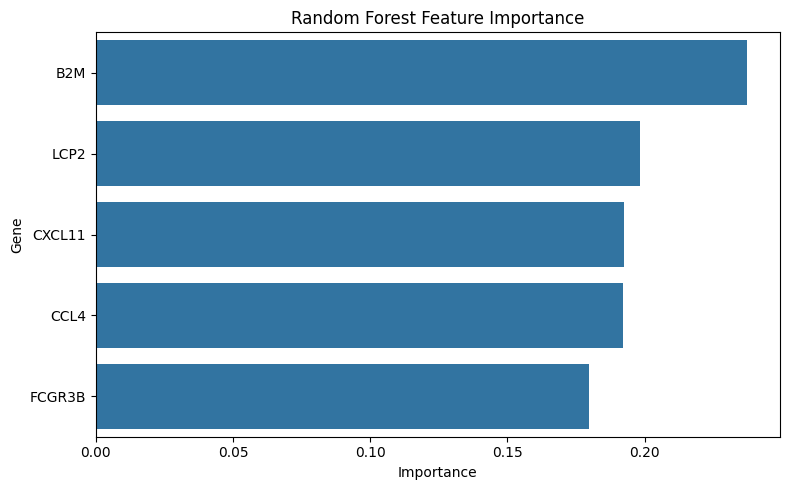


AUC - Logistic: 0.834
AUC - Random Forest: 0.753


In [28]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["non-TCMR"] else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [29]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.801
